# Métodos de clasificación


## Ejemplos

Un __clasificador es un método supervisado__ que permite entrenar un modelo para que determine __la clase más probable__ que debemos asignar a un registro dado de características. Para ello el conjunto de entrenamiento tendrá una serie de $N$ registros clasificados, que permiten al ordenador aprender a clasificar registros sin clase. Por ejemplo:

- __Detección de SPAM__. En base a un conjunto de características de los correos se entrena con supervisión al ordenador para que determine si son o no SPAM.
- __Datos de microarrays__. A partir de un subconjunto de genes óptimos para diagnosticar cancer.

## Método Naïve Bayes

Si la matriz $X$ está compuesta por $N$ observaciones (filas) con $n$ características $X_1, ..., X_i, ..., X_n$ que forman las columnas de la matriz.

Si la matriz de objetivos $Y$ tiene $m$ clases dadas por $1, ..., k, ..., m$.

Una observación $\bar{x}=(x_1, x_2, \cdots, x_n)$, no etiquetada, de acuerdo al __Teorema de Bayes__ se etiqueta en aquella clase $k$ que cumple:

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} P(k)P(\bar{x}|k)$$

Si hacemos la __suposición Naïve__ de que los valores de las características $X_i$ son __independientes__ entre si y tienen una __distribución normal__ gaussiana (para los valores $X_i$):

$$ clase(\bar{x}) = \underset{k \in \{1,...,m\}}{\arg\max} \begin{bmatrix} f_k\prod\limits_{i=1}^{n} N(x_i, \mu_{i,k}\thinspace, \sigma_{i,k}^2) \end{bmatrix}$$

Donde:

- $N(x_i, \mu_{i,k}\thinspace, \sigma_{i,k}^2)$ : es la función de densidad normal gaussiana del valor $x_i$ (columna $X_i$), siendo $\mu_{i,k}$ y $\sigma_{i,k}^2$ la media y la varianza de los valores de la columna $X_i$ '_filtrados_' por la clase $k$.
- $f_k$ : es la frecuencia de la clase $k$ en la matriz $X$, que se obtiene a partir del número de observaciones etiquetadas como clase $k$ sobre el total.

Observe que para definir el modelo son necesarias $n \times m$ distribuciones normales distintas.


### Entrenamiento con Naïve Bayes

Un ejemplo de los datos que hay que calcular para entrenar el conjunto IRIS con el método Naïve Bayes se muestra en el siguiente gráfico:

<img src="images/bayes_iris.png" width="700px" align="center">

La __verosimilitud__ que tiene, _por ejemplo, la observación_ $\bar{x} = (4.6, 3.6, 1.1, 0.2)$ de pertenecer a cada tipo de flor es:

In [16]:
from scipy.stats import norm  # Importa el submodulo asociado a la distribución normal
vero_Setosa = 0.33*norm.pdf(4.6, 5.01, 0.35)*norm.pdf(3.6, 3.43, 0.38)*norm.pdf(1.1, 1.46, 1.74)*norm.pdf(0.2, 0.25, 0.11)
vero_Versic = 0.33*norm.pdf(4.6, 5.94, 0.52)*norm.pdf(3.6, 2.77, 0.31)*norm.pdf(1.1, 4.26, 0.47)*norm.pdf(0.2, 1.33, 0.2)
vero_Virgin = 0.33*norm.pdf(4.6, 6.59, 0.64)*norm.pdf(3.6, 2.97, 0.32)*norm.pdf(1.1, 5.55, 0.55)*norm.pdf(0.2, 2.03, 0.27)
vero_Setosa, vero_Versic, vero_Virgin

(0.13205703262668808, 9.890298012720692e-21, 2.0303781679609043e-28)

En este caso, __la predicción__ será __Setosa__ por tener el __mayor valor de verosimilitud__.

### Aplicar el método Naïve-Bayes para clasificar el conjunto Iris

__El conjunto de datos de Iris se encuentra en la librería sk-learn__, por lo que se importa de ahí

   - Primero se vuelca a un DataFrame, con 4 columnas con sus caracteristicas y una columna con la clasificación objetivo
   - Se muestra la descripción de cada uno de los valores (0, 1, 2) objetivo.

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Inicialmente se divide el conjunto de datos de entrada en Entrenamiento (75%) y Validación (25%). Conjuntos Train y Test

 - Para hacer esta división del conjunto se utiliza una función de la librería sk-learn: __train_test_split__
 - Los parámetro __train_test__ o __test_size__ : indica el ratio que tiene el conjunto de entrenamiento o validación respecto al total.
 - El parámetro __shuffle__ : indica si los datos se barajan antes de dividirse
 - El parámetro __random_state__ : fija un valor de la semilla aleatoria, para que la división sea reproducible
 - El parámetro __stratify__ : indica que la división se realiza proporcional a los valores de las etiquetas
 
 Mas detalles : <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</a>

In [19]:
from sklearn.model_selection import train_test_split
X, y = df.values[:,0:4], df.values[:,4]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [20]:
y_test

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 2., 2., 2., 1., 2., 1., 0., 0.,
       2., 0., 1., 2., 1., 1., 0., 2., 0., 0., 1., 2., 1., 0., 1., 2., 2.,
       0., 1., 2., 2.])

#### Se Resuelve utilizando el clasificador Naive Bayes de sklearn

Se utiliza la clase __GaussianNB__ de la librería __naive_bayes__ (<a href="https://scikit-learn.org/stable/modules/naive_bayes.html#">ver aquí</a>). Lo primero es crear un objeto, por ejemplo __clf_NB__, llamandoa al __constructor__.

Llamando al método __fit__ desde el objeto __clf_NB__ se ajusta el modelo contra el conjunto de entrenamiento.

Para validar el modelo se predicen las observaciones __X_test__ del conjunto de validación se comparan las clases obtenidas contra los valores correctos de __y_test__. El porcentaje de aciertos es la precisión del clasificador

In [31]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred = clf_NB.predict(X_test)
accuracy = clf_NB.score(X_test, y_test)
print('Exactitud del clasificador (porcentaje de aciertos) = %.2f \n' %(100*accuracy))

Exactitud del clasificador (porcentaje de aciertos) = 97.37 



### Y la correspondiente matriz de confusión

La __matriz de confusión__ de una forma gráfica nos da los __aciertos__ en la clasificación (_diagonal principal_) y dónde se encuentran los __fallos__.

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


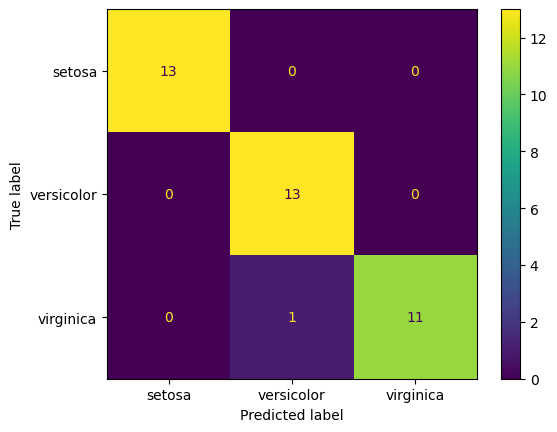

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=iris['target_names']).plot()

## Arboles de decisión

Los __árboles de decisión__ son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

__Ventajas__

- Los árboles son fáciles de interpretar aun cuando las relaciones entre predictores son complejas.
- Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos.
- No se ven muy influenciados por datos atípicos ('_outliers_').
- Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
- Pueden aplicarse a problemas de regresión y clasificación.

__Desventajas__

- Su tendencia al sobreajuste ('_overfitting_') y alta varianza. Sin embargo, existen técnicas más complejas que, haciendo uso de la combinación de múltiples árboles (bagging, random forest, boosting), consiguen mejorar en gran medida este problema.
- Son sensibles a datos de entrenamiento desbalanceados (una de las clases domina sobre las demás).
- No son capaces de extrapolar fuera del rango de los predictores observado en los datos de entrenamiento.

__Implementados en sk-learn__ en las clases <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecissionTreeClassifier</a> y <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecissionTreeRegressor</a> 

__Obtención del árbol de decisión__

La __entropía__ es una forma de cuantificar el __desorden__ de un sistema. En el caso de los nodos, el desorden se corresponde con la impureza. Si un nodo es __puro__, contiene únicamente observaciones de __una clase__, su __entropía es cero__. 

$$D=-\displaystyle\sum_{k=1}^K f_k \cdot log_2(f_k)$$

Donde $f_k$ representa la frecuencia o proporción de observaciones de la clase $k$.

__El algoritmo__ busca en el conjunto __X__ aquella condición $x_i \ge a$ que de lugar a una minimización de la entropia. La entropia se calcula directamente sobre __y__.

En el siguiente ejemplo inicialmente la entropia vale 1.585 y la condición __ancho de pétalo $\ge$ 0.8__ se consigue partir en 2 hojas con la entropia mínima posible. El cálculo de la entropia inicial, atendiendo al recuento de cada clase sería:

In [42]:
-(37/112)*np.log2(37/112) -(37/112)*np.log2(37/112) -(38/112)*np.log2(38/112)

1.5848478277058313

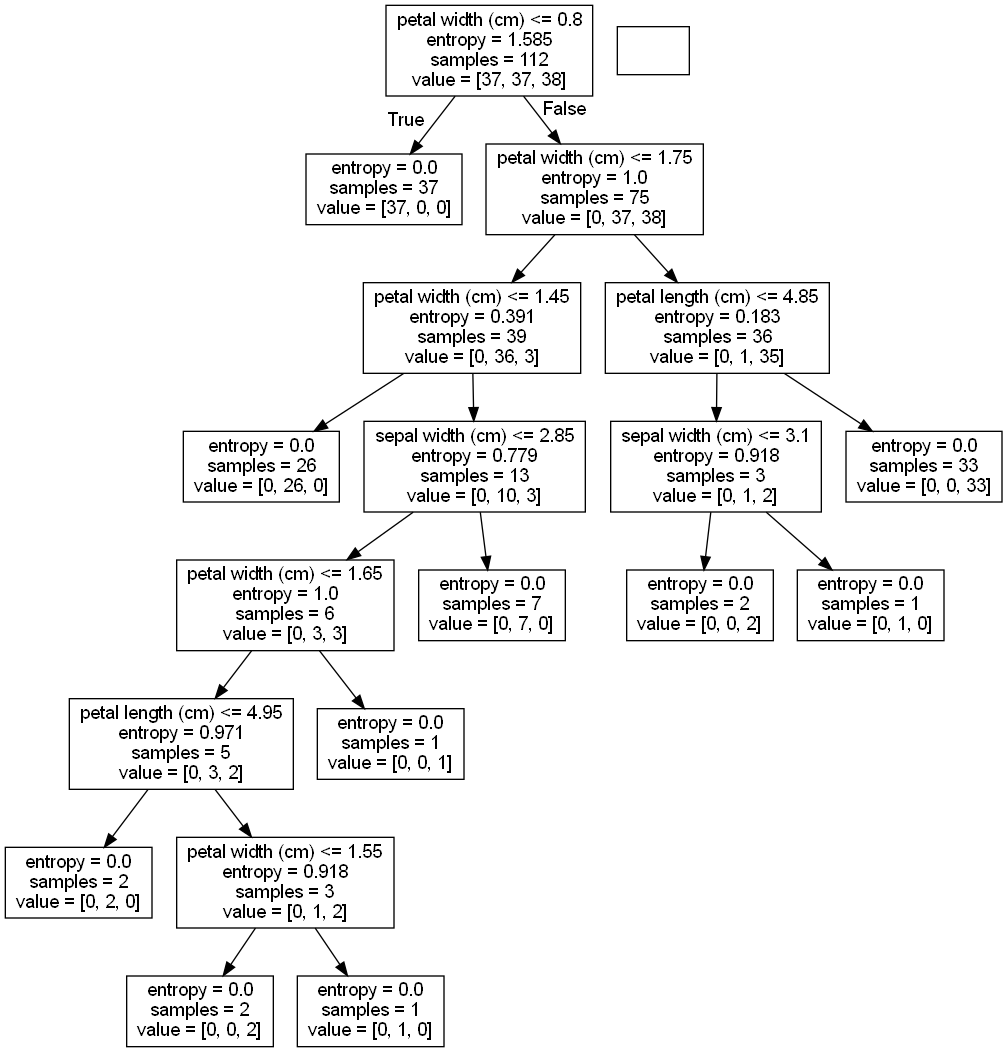

In [38]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf,
                           feature_names=iris.feature_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('./images/tree_iris.png')
display.Image("./images/tree_iris.png", width="500")

<b style="color:rgb(0,100,250);">Existe la posibilidad</b> de entrenar un conjunto de arboles de decisión, por ejemplo 100, y que la clasificación se obtenga por voto mayoritario de todos ellos. Es lo que se llama __Bosque Aleatorio__ o __Random Forest__. Está disponible en sk-learn:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier de sk-learn</a>

## K vecinos cercanos

El algoritmo de __K Vecinos__ (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier"> KNeighborsClassifier</a> ) implementa la selección de la clase más probable a partir del __voto mayoritario__ de las __K__ observaciones más cercanas del conjunto __X__.

El cuello de botella computacional de este algoritmo es la búsqueda de los vecinos cercanos de una observación $\bar{x}$ en __X__, que se presenta si el número de elementos de __X__  es elevado y se usa un método de fuerza bruta. Por ello se suele estructurar el conjunto __X__ de forma que sea más ágil en la busqueda de los vecinos. Esto se consigue con <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree">BallTree</a> o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree">KDTree</a>, por ejemplo. El tipo de algoritmo de búsqueda se pasa en el parámetro __algorithm__, aunque por defecto lleva el valor _'auto'_ en el que se decide que estrategia tomar en función del tipo de datos existentes en el conjunto __X__.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

clf_KV = KNeighborsClassifier()
clf_KV.fit(X_train, y_train)
y_pred = clf_KV.predict(X_test)
accuracy = clf_KV.score(X_test, y_test)
print('Exactitud del clasificador (porcentaje de aciertos) = %.2f \n' %(100*accuracy))

Exactitud del clasificador (porcentaje de aciertos) = 100.00 

